In [1]:
# ライブラリのインポート
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

# Jupyter Notebookの中でインライン表示する場合の設定（これが無いと別ウィンドウでグラフが開く）
%matplotlib inline

In [2]:
# 学習データの読み込み
df = pd.read_csv('./train.csv')

In [3]:
# 学習データ（先頭5行）の内容確認
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 重回帰分析での予測

In [4]:
# XにOverallQualとGrLiveArea、yにSalePriceをセット
X = df[['OverallQual', 'GrLivArea']].values
y = df['SalePrice'].values

# アルゴリズムに線形回帰（Linear Regression)を採用
slr = LinearRegression()

# fit関数で学習開始
slr.fit(X, y)

# 偏回帰係数（回帰分析において得られる回帰方程式の各説明変数の係数）を出力
# 偏回帰係数はscikit-learnのcoefで取得
print('傾き：{0}'.format(slr.coef_))
a1, a2 = slr.coef_

# y切片（直線とy軸との交点）を出力
print('y切片：{0}'.format(slr.intercept_))
b = slr.intercept_

傾き：[32849.04744063    55.86222591]
y切片：-104092.66963598106


/Users/takahiro/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/sklearn/linear_model/_base.py:533: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


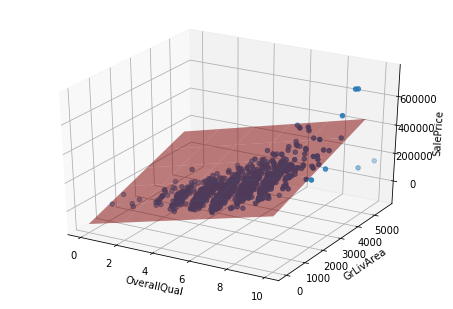

In [5]:
# 3D描画（散布図の描画）
x, y, z = np.array(df['OverallQual']), np.array(df['GrLivArea']), np.array(df['SalePrice'].values)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter3D(np.ravel(x), np.ravel(y), np.ravel(z))

# 3D描画（回帰平面の描画）
# np.arange(0, 10, 2)は初項0, 公差2で終点が10の等差数列（array([2, 4, 6, 8, 10])
X, Y = np.meshgrid(np.arange(0, 12, 2), np.arange(0, 6000, 1000))
Z = a1 * X + a2 * Y + b
ax.plot_surface(X, Y, Z, alpha = 0.5, color = 'red') # alphaで透明度を指定
ax.set_xlabel('OverallQual')
ax.set_ylabel('GrLivArea')
ax.set_zlabel('SalePrice')

plt.show()

In [6]:
# テストデータの読み込み
df_test = pd.read_csv('./test.csv')

In [7]:
# テストデータの内容確認
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [10]:
# テストデータのOverallQualとGrLivAreaの値をセット
X_test = df_test[['OverallQual', 'GrLivArea']].values

# 学習済みのモデルから予測した結果をセット
y_test_pred = slr.predict(X_test)

In [11]:
# 学習済みのモデルから予測した結果を出力
y_test_pred

array([110205.12197947, 167242.51323765, 151152.13356901, ...,
       128527.93207683, 114338.92669655, 237575.11426161])